In [ ]:
#Visual notebook for get data workflow 4

In [ ]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import os
import random
import glob
import numpy as np
import pdb

In [2]:
#Initial grouping of files
#Functions
def read_tsv(H_groups_file):
	'''Read ids and H-groups into dict
	'''

	H_groups = {} #Store H-groups and uids

	with open(H_groups_file) as file:
		for line in file:
			line = line.rstrip() #remove \n
			line = line.split(',')
			uid = line[0]
			H_group = line[1:]
			H_group = H_group[0]+'.'+H_group[1]+'.'+H_group[2]+'.'+H_group[3]
			H_groups[uid] = H_group


	return H_groups

def read_fasta(fasta_file):
	'''Read fasta file into dict
	'''

	sequences = {} #Store sequences

	with open(fasta_file) as file:
		for line in file:
			line = line.rstrip() #remove \n
			if line[0] == '>':
				uid = line.split('|')[2].split('/')[0]
			else:
				sequences[uid] = line

	return sequences


def get_groups(H_groups, sequences):
	'''Get H-group for each uid and group sequences accordingly
	'''


	grouped_sequences = {} #Sequences grouped by H-group

	for key in sequences:
		H_group = H_groups[key]
		sequence = sequences[key]

		if H_group not in grouped_sequences.keys(): #If not in new dict - add
			grouped_sequences[H_group] = [key + '/' + sequence]
		else:
			grouped_sequences[H_group].append(key + '/' + sequence) #Otherwise append

	return grouped_sequences



H_groups = read_tsv('/home/pbryant/data/CATH/h_grouped/H_group.tsv')
sequences = read_fasta('/home/pbryant/data/CATH/reallybelow95.fa')
grouped_sequences = get_groups(H_groups, sequences)

In [3]:
print('Original number of groups:',len(Counter(H_groups.values()).keys()))
print('Groups with no more than 95 % sequence identity:',len(grouped_sequences.keys()))
print(len(sequences))

Original number of groups: 6119
Groups with no more than 95 % sequence identity: 6002
54271


In [4]:
failed_pdb_filter = pd.read_csv('/home/pbryant/data/CATH/failed_pdb_filter_2.6Å.txt', sep = '\n', header = None)
u_hgroups = []
for row in failed_pdb_filter[0]:
    group = H_groups[row]
    if group in u_hgroups:
        continue
    else:
        u_hgroups.append(group)
print('Failed groups:',len(u_hgroups), '|Failed uids:',len(failed_pdb_filter))
#Should count how many groups disappear by removing the uids that failed

Failed groups: 2984 |Failed uids: 12723


In [5]:
failed_uids = [*failed_pdb_filter[0]]
passed_uids = []
for uid in sequences:
    if uid in failed_uids:
        continue
    else:
        passed_uids.append(uid)
    
    

In [18]:
print(len(passed_uids))
print(len(failed_uids))
print(len(passed_uids)+len(failed_uids))
print(len(sequences))

41548
12723
54271
54271


In [6]:
H_groups = read_tsv('/home/pbryant/data/CATH/h_grouped/H_group.tsv')
passed_uids_grouped = {} #Sequences grouped by H-group
for uid in passed_uids:
    H_group = H_groups[uid]
       
    if H_group not in passed_uids_grouped.keys(): #If not in new dict - add
        passed_uids_grouped[H_group] = [uid]
    else:
        passed_uids_grouped[H_group].append(uid) #Otherwise append


Text(0.5, 1.0, 'At least 2 entries\nTotal number of entries: 39211\nTotal number of groups: 2489')

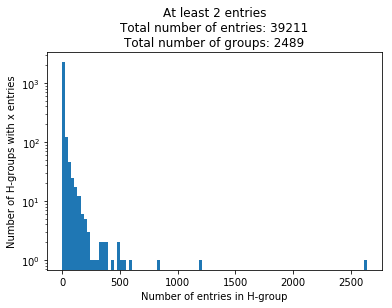

In [7]:
num_entries = []
over_x = []
x = 2
passed_uids_grouped_over_x = {}
for key in passed_uids_grouped:
    num_uids = len(passed_uids_grouped[key])
    num_entries.append(num_uids)
    if num_uids >= x:
        over_x.append(num_uids)
        passed_uids_grouped_over_x[key]=passed_uids_grouped[key]
plt.hist(over_x, bins = 100, log = True)
plt.xlabel('Number of entries in H-group')
plt.ylabel('Number of H-groups with x entries')
average = sum(over_x)/len(over_x)
plt.title('At least 2 entries\n'+'Total number of entries: '+str(sum(over_x)) + '\n' +'Total number of groups: ' + str(len(over_x)))

In [48]:
#passed_uids_grouped_over_x
outdir = '/home/pbryant/data/CATH/h_grouped/below95_2.6Å_above2_grouped/'
for group in passed_uids_grouped_over_x:
    group_dir = outdir+group
    os.mkdir(group_dir)
    uids = passed_uids_grouped_over_x[group]
    for uid in uids:
        sequence = sequences[uid]
        with open(group_dir+'/'+uid+'.fa', "w") as file:
            file.write('>'+uid+'\n')
            i = 0 #index
            while i<len(sequence):
                file.write(sequence[i:i+60]+'\n')
                i+=60
        


In [64]:
a= [1,2,3]
random.Random(2).shuffle(a)
a

[2, 3, 1]

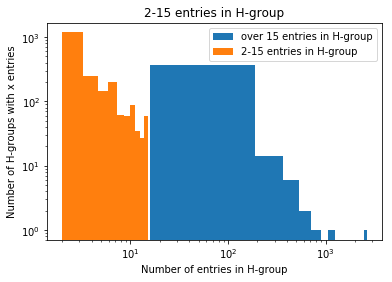

Number of entries in groups with over 2, but under 15 entries: 9322
Number of entries in groups with over 15 entries: 29889
Number of groups with under 15 entries: 2102
Number of groups with above 15 entries: 387
Number of possible uids considering groups with above 2, but no more than 15 entries: 15127
Number of possible uid pairs considering groups with above 2, but no more than 15 entries: 67445


In [13]:
over_y = []
under_y = []
number_possible_uids = 0
number_possible_pairs = 0
y = 15
for i in over_x:
    if i>y:
        over_y.append(i)
        number_possible_uids+=15
        number_possible_pairs+=105
    else:
        under_y.append(i)
        number_possible_uids+=i
        number_possible_pairs+=(i*(i-1)/2)
plt.hist(over_y, bins = 15, label = 'over 15 entries in H-group')
plt.hist(under_y, bins = 10, label = '2-15 entries in H-group')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of entries in H-group')
plt.ylabel('Number of H-groups with x entries')
plt.title('2-15 entries in H-group')
plt.show()
print('Number of entries in groups with over 2, but under 15 entries:',sum(under_y))
print('Number of entries in groups with over 15 entries:',sum(over_y))
print('Number of groups with under 15 entries:',len(under_y))
print('Number of groups with above 15 entries:',len(over_y))
print('Number of possible uids considering groups with above 2, but no more than 15 entries:',number_possible_uids)
print('Number of possible uid pairs considering groups with above 2, but no more than 15 entries:',int(number_possible_pairs))

In [ ]:
# use your path
all_files = glob.glob('/home/p/pbryant/pfs/results/CATH/20190821/*/*str.tsv')     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = [pd.read_csv(f, sep='\t') for f in all_files]
for dataframe, filename in zip(df_from_each_file, all_files):
    hgroup = filename.split('/')[-2]
    dataframe['H_group'] = filename.split('/')[-2]
    dataframe['C.'] = hgroup.split('.')[0]+'.'
    dataframe['C.A.'] = hgroup.split('.')[0]+'.'+hgroup.split('.')[1]
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)

In [26]:
uid1 = [*concatenated_df['uid1']]
uid2 = [*concatenated_df['uid2']]
uid1.extend(uid2)
Counter(uid1).keys()

,uid1,uid2,MLAAdist,RMSD,TMscore_high,TMscore_low,H_group,C.,C.A.
0,2dgjA01,2dgjB02,0.86029,1.81,0.84026,0.83412,1.20.120.1850,1.,1.20
1,2iu4A02,1oi2A02,1.33061,1.49,0.84710,0.78784,3.30.1180.20,3.,3.30
2,2iu4A02,3ct4A02,0.86795,1.32,0.92781,0.84568,3.30.1180.20,3.,3.30
3,1oi2A02,3ct4A02,1.37535,1.10,0.91112,0.77124,3.30.1180.20,3.,3.30
4,3kh5A02,4nocD00,2.63457,3.34,0.65214,0.64482,3.10.580.10,3.,3.10
5,4o9kA00,4gqwA00,2.52463,2.80,0.77237,0.73221,3.10.580.10,3.,3.10
6,3fnaA00,2yvyA02,2.12661,2.63,0.73747,0.68145,3.10.580.10,3.,3.10
7,3fnaA00,3k2vA00,0.15214,0.64,0.97600,0.89065,3.10.580.10,3.,3.10
8,2nycA00,3fnaA00,2.23725,2.29,0.77699,0.68587,3.10.580.10,3.,3.10
9,4cooA03,4nocD00,2.33057,2.64,0.65546,0.65162,3.10.580.10,3.,3.10


In [ ]:
complete_df = concatenated_df
classes = {1:'Alpha', 2: 'Beta', 3: 'Alpha Beta', 4: 'Few 2ndary str'}
print(classes)
colors = {1: 'royalblue', 2: 'k', 3: 'yellowgreen', 4: 'violet'}
ucas = [*Counter([*complete_df['C.A.']]).keys()]
fig = plt.figure(figsize=(20,10))
sizes = {}

#Plot total average
avs = [] #Save average score
js = [] #Save dists
total_avs = {}
step = 0.1
df = complete_df
mldists = np.asarray(df['MLAAdist'])
scores = np.asarray(df['RMSD'])
for j in np.arange(min(mldists)+step,max(mldists)+step,step):
    below_df = df[df['MLAAdist']<j]
    below_df = below_df[below_df['MLAAdist']>j-step]
    cut_scores = np.asarray(below_df['RMSD'])
    av= np.average(cut_scores)
    avs.append(av)
    js.append(j-step)
    total_avs[j-step] = av
plt.plot(js, avs, label = 'Total average', color = 'r', linewidth = 6)
    
#Save distance from average
distance_from_av = {}

for i in range(1,5):_
for uca in ucas:
    df = complete_df[complete_df['C.A.']==uca]
    mldists = np.asarray(df['MLAAdist'])
    scores = np.asarray(df['RMSD'])
    #plt.scatter(mldists, scores, color = 'wheat')
    avs = [] #Save average score
    js = [] #Save dists
    distance_from_av[uca] = []

    for j in np.arange(step,max(mldists)+step,step):
        below_df = df[df['MLAAdist']<j]
        below_df = below_df[below_df['MLAAdist']>j-step]
        cut_scores = np.asarray(below_df['RMSD'])
        if cut_scores.size == 0:
            continue
        av= np.average(cut_scores)
        avs.append(av)
        js.append(j-step)
                    
        
        distance_from_av[uca].append(av-total_avs[j-step])

    perc = np.round(len(df)*100/len(complete_df),2)
    sizes[uca] = perc
    plt.plot(js, avs, label = uca+', '+str(perc)+' %, '+str(len(df))+' points', color = colors[int(float(df['C.'].values[0]))], linewidth = 3)
   

#Plot Class
y = 1.8
font = {'family': 'serif', 'color':  colors[1], 'weight': 'normal', 'size': 16}
plt.text(0, y, classes[1], fontdict=font)
font = {'family': 'serif', 'color':  colors[2], 'weight': 'normal', 'size': 16}
plt.text(0, y-0.2, classes[2], fontdict=font)
font = {'family': 'serif', 'color':  colors[3], 'weight': 'normal', 'size': 16}
plt.text(0, y-0.4, classes[3], fontdict=font)
font = {'family': 'serif', 'color':  colors[4], 'weight': 'normal', 'size': 16}
#plt.text(0, y-0.6, classes[4], fontdict=font)
plt.legend(loc = 'best')
#plt.xscale('log')
plt.xlabel('MLAAdist')
plt.ylabel('Running average RMSD')
plt.title('Running average plot')
plt.rc('axes', titlesize=18, labelsize=14)
plt.show()